# Customer Segmentation

In [1]:
import datetime
print(datetime.datetime.now())

2020-08-12 23:03:29.825727


In [2]:
#importing packages

import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns 

from sklearn.metrics import silhouette_score, silhouette_samples
import sklearn.metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture

import pandas_profiling

import itertools

import scipy


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

# Read in Data

In [3]:
df = pd.read_csv('C:/Users/shrut/Documents/Shruti admin/Canada 1/QU/Module 4/Marketing Analytics/Final Project/Marketing-Customer-Value-Analysis.csv')

list(df)
df.shape
df.info()
df.describe().transpose()
df.head()

['Customer',
 'State',
 'Customer Lifetime Value',
 'Response',
 'Coverage',
 'Education',
 'Effective To Date',
 'EmploymentStatus',
 'Gender',
 'Income',
 'Location Code',
 'Marital Status',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Total Claim Amount',
 'Vehicle Class',
 'Vehicle Size']

(9134, 24)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

,count,mean,std,min,25%,50%,75%,max
Customer Lifetime Value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
Income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
Monthly Premium Auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
Months Since Last Claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
Months Since Policy Inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
Number of Open Complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
Number of Policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
Total Claim Amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


# Exploratory Analysis

Sales Channel  Response
Agent          No          0.808456
               Yes         0.191544
Branch         No          0.885469
               Yes         0.114531
Call Center    No          0.891218
               Yes         0.108782
Web            No          0.882264
               Yes         0.117736
Name: Customer, dtype: float64

Text(0, 0.5, 'Engagement Rate (%)')

Text(0.5, 1.0, 'Engagement Rates by Channel')

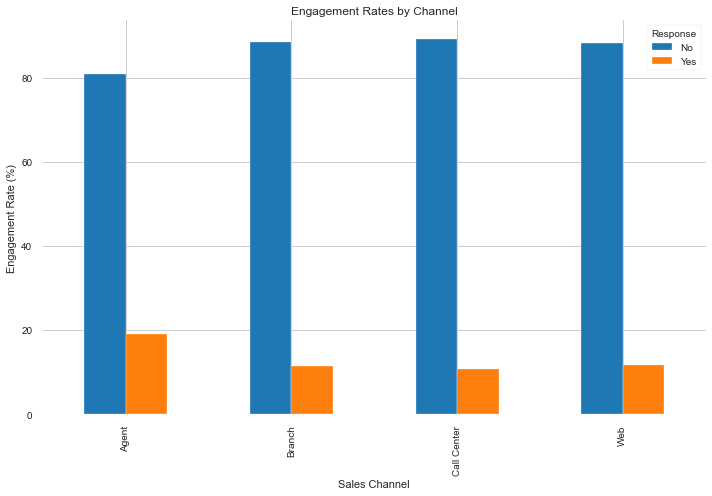

In [4]:
engagement_rate_auto_insurance = df.groupby([
     'Sales Channel', 'Response']). count()['Customer'] / df.groupby([
    'Sales Channel']).count()['Customer']
    
    
engagement_rate_auto_insurance


ax = (engagement_rate_auto_insurance.unstack()*100.0).plot(
    kind='bar',
    figsize=(10, 7),
    grid=True 
)

ax.set_ylabel('Engagement Rate (%)')
ax.set_title('Engagement Rates by Channel')
plt.show()

([<matplotlib.patches.Wedge at 0x1df4c3c1388>,
 [Text(0.9166346673555396, 0.6080961162530144, 'Arizona'),
  Text(-0.695178867034325, 0.8524824589567064, 'California'),
  Text(-0.9652901894230342, -0.5274607570271393, 'Nevada'),
  Text(0.13960816892761638, -1.0911047425287264, 'Oregon'),
  Text(1.058826509136956, -0.2981382624703647, 'Washington')],
 [Text(0.4999825458302942, 0.3316887906834624, '18.6%'),
  Text(-0.37918847292781355, 0.4649904321582034, '34.5%'),
  Text(-0.5265219215034731, -0.2877058674693487, '9.7%'),
  Text(0.07614991032415437, -0.5951480413793052, '28.5%'),
  Text(0.5775417322565214, -0.16262087043838072, '8.7%')])

Text(0.5, 1.0, 'State')

(-1.117031274663833,
 1.1008110265609325,
 -1.1122439582263282,
 1.116988885199292)

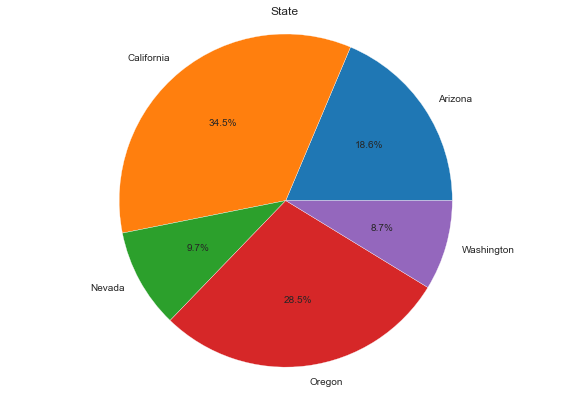

Text(0.5, 0, 'Engagement')

Text(0, 0.5, 'Count')

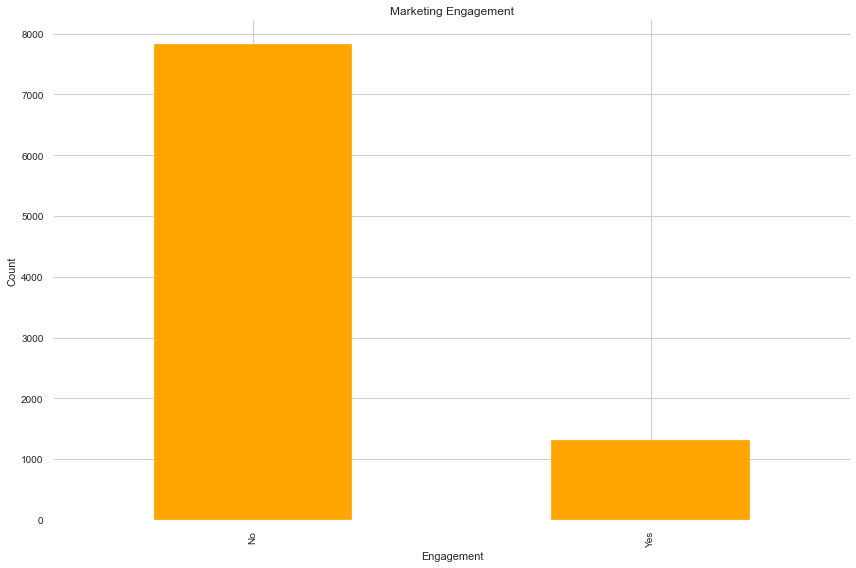

Text(0.5, 0, 'Coverage')

Text(0, 0.5, 'Count')

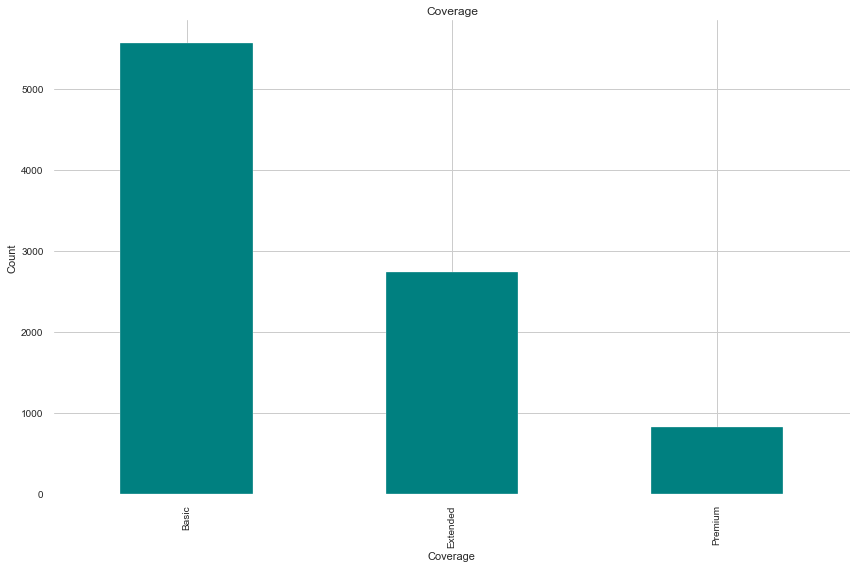

Text(0.5, 0, 'Education')

Text(0, 0.5, 'Count')

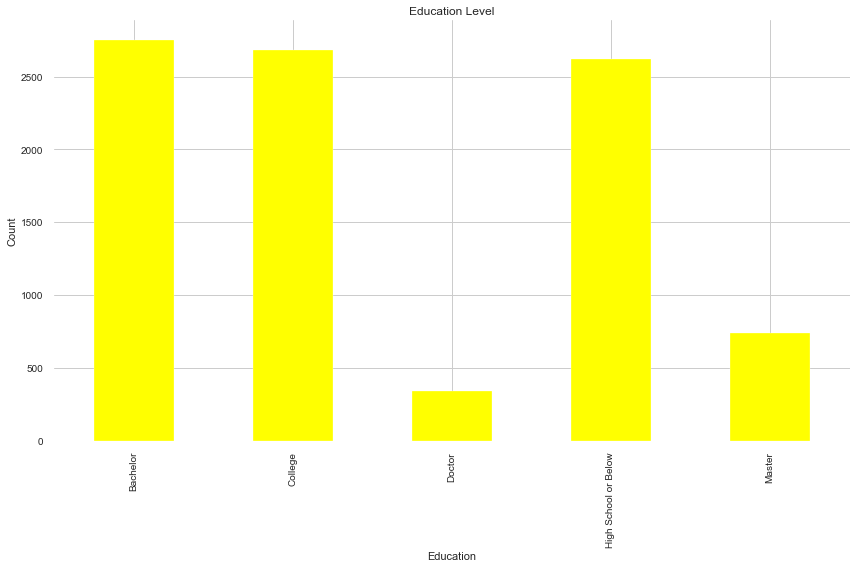

Text(0.5, 0, 'Gender')

Text(0, 0.5, 'Count')

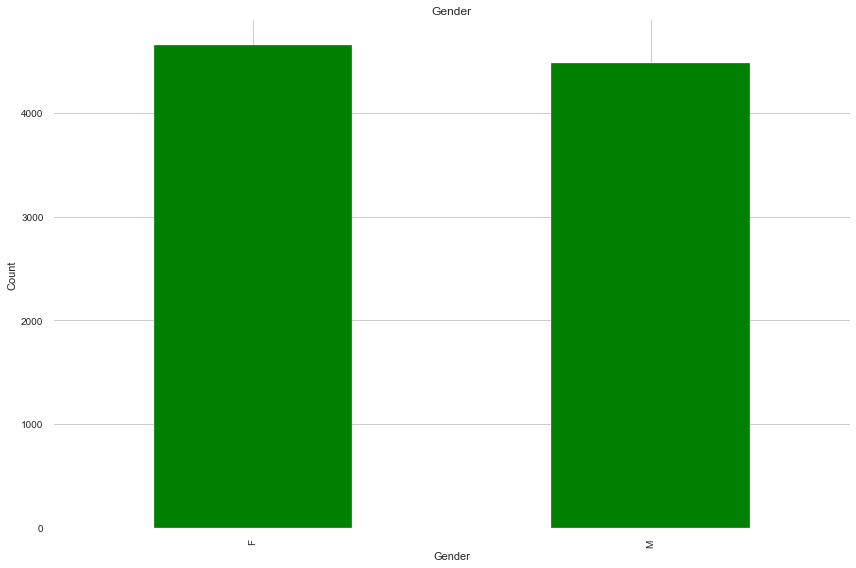

([<matplotlib.patches.Wedge at 0x1df4c5cc448>,
 [Text(-0.03442333441997446, 1.0994612471785492, 'Male'),
  Text(0.03442343735896545, -1.099461243955599, 'Female')],
 [Text(-0.018776364229076973, 0.5997061348246631, '51.0%'),
  Text(0.018776420377617516, -0.5997061330666904, '49.0%')])

TypeError: title() missing 1 required positional argument: 'label'

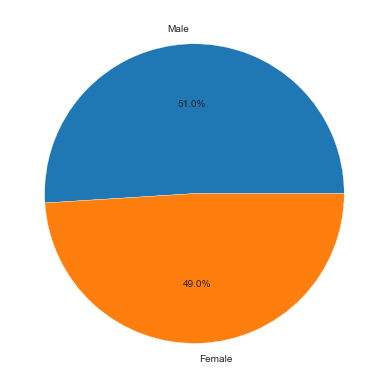

In [5]:
import matplotlib.pyplot as plt

my_data = df.groupby('State').count()['Customer']
my_labels = 'Arizona','California','Nevada', 'Oregon', 'Washington'
plt.pie(my_data,labels=my_labels,autopct='%1.1f%%')
plt.title('State')
plt.axis('equal')
plt.show()

ax = df.groupby('Response').count()['Customer'].plot(
    kind='bar',
    color='orange',
    grid=True,
    figsize=(12,8),
    title='Marketing Engagement'
)

ax.set_xlabel('Engagement')
ax.set_ylabel('Count')

plt.show()

plt.savefig('C:/Users/shrut/Documents/Shruti admin/Canada 1/QU/Module 4/Marketing Analytics/Final Project/Marketing-Customer-Value-Analysis.png')


ax = df.groupby('Coverage').count()['Customer'].plot(
    kind='bar',
    color='teal',
    grid=True,
    figsize=(12,8),
    title='Coverage'
)

ax.set_xlabel('Coverage')
ax.set_ylabel('Count')

plt.show()

ax = df.groupby('Education').count()['Customer'].plot(
    kind='bar',
    color='yellow',
    grid=True,
    figsize=(12,8),
    title='Education Level'
)

ax.set_xlabel('Education')
ax.set_ylabel('Count')

plt.show()

ax = df.groupby('Gender').count()['Customer'].plot(
    kind='bar',
    color='green',
    grid=True,
    figsize=(12,8),
    title='Gender'
)

ax.set_xlabel('Gender')
ax.set_ylabel('Count')

plt.show()

my_data = df.groupby('Gender').count()['Customer']
my_labels = 'Male','Female'
plt.pie(my_data,labels=my_labels,autopct='%1.1f%%')
plt.title()
plt.axis('equal')
plt.show()

ax = df.groupby('Location Code').count()['Customer'].plot(
    kind='bar',
    color='red',
    grid=True,
    figsize=(12,8),
    title='Location'
)

ax.set_xlabel('Location')
ax.set_ylabel('Count')

plt.show()

ax = df.groupby('Marital Status').count()['Customer'].plot(
    kind='bar',
    color='red',
    grid=True,
    figsize=(12,8),
    title='Marital Status'
)

ax.set_xlabel('Marital Status')
ax.set_ylabel('Count')

plt.show()

ax = df.groupby('Policy').count()['Customer Lifetime Value'].plot(
    kind='bar',
    color='grey',
    grid=True,
    figsize=(12,8),
    title='Policy'
)

ax.set_xlabel('Policy')
ax.set_ylabel('Count')

plt.show()

ax = df.groupby('Renew Offer Type').count()['Customer'].plot(
    kind='bar',
    color='orchid',
    grid=True,
    figsize=(12,8),
    title='Offer Type'
)

ax.set_xlabel('Offer Type')
ax.set_ylabel('Count')

plt.show()

my_data = df.groupby('Sales Channel').count()['Customer']
my_labels = 'Agent','Branch', 'Call Center', 'Web'
plt.pie(my_data,labels=my_labels,autopct='%1.1f%%')
plt.title('Sales Channel')
plt.axis('equal')
plt.show()

ax = df.groupby('Vehicle Class').count()['Customer'].plot(
    kind='bar',
    color='darkgreen',
    grid=True,
    figsize=(12,8),
    title='Vehicle Class'
)

ax.set_xlabel('Vehicle Class')
ax.set_ylabel('Count')

plt.show()

# Data Cleaning

In [8]:
#formatting
df.columns = df.columns.str.replace(' ', '')
df.columns

Index(['Customer', 'State', 'CustomerLifetimeValue', 'Response', 'Coverage',
       'Education', 'EffectiveToDate', 'EmploymentStatus', 'Gender', 'Income',
       'LocationCode', 'MaritalStatus', 'MonthlyPremiumAuto',
       'MonthsSinceLastClaim', 'MonthsSincePolicyInception',
       'NumberofOpenComplaints', 'NumberofPolicies', 'PolicyType', 'Policy',
       'RenewOfferType', 'SalesChannel', 'TotalClaimAmount', 'VehicleClass',
       'VehicleSize'],
      dtype='object')

In [9]:
df.select_dtypes(include=['object'])
df.head(10)

,Customer,State,Response,Coverage,Education,EffectiveToDate,EmploymentStatus,Gender,LocationCode,MaritalStatus,PolicyType,Policy,RenewOfferType,SalesChannel,VehicleClass,VehicleSize
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


,Customer,State,CustomerLifetimeValue,Response,Coverage,Education,EffectiveToDate,EmploymentStatus,Gender,Income,...,MonthsSincePolicyInception,NumberofOpenComplaints,NumberofPolicies,PolicyType,Policy,RenewOfferType,SalesChannel,TotalClaimAmount,VehicleClass,VehicleSize
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,1/25/11,Employed,F,62902,...,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize
6,XZ87318,Oregon,5380.898636,Yes,Basic,College,2/24/11,Employed,F,55350,...,13,0,9,Corporate Auto,Corporate L3,Offer1,Agent,321.600000,Four-Door Car,Medsize
7,CF85061,Arizona,7216.100311,No,Premium,Master,1/18/11,Unemployed,M,0,...,68,0,4,Corporate Auto,Corporate L3,Offer1,Agent,363.029680,Four-Door Car,Medsize
8,DY87989,Oregon,24127.504020,Yes,Basic,Bachelor,1/26/11,Medical Leave,M,14072,...,3,0,2,Corporate Auto,Corporate L3,Offer1,Agent,511.200000,Four-Door Car,Medsize
9,BQ94931,Oregon,7388.178085,No,Extended,College,2/17/11,Employed,F,28812,...,7,0,8,Special Auto,Special L2,Offer2,Branch,425.527834,Four-Door Car,Medsize


In [10]:
#created dummies for categorical variables that are the key drivers for CLV
df = pd.get_dummies(df, columns=['Response','Coverage','Education','EmploymentStatus', 'Gender', 'LocationCode', 'MaritalStatus', 'PolicyType', 'SalesChannel', 'VehicleClass'])
df.head()

,Customer,State,CustomerLifetimeValue,EffectiveToDate,Income,MonthlyPremiumAuto,MonthsSinceLastClaim,MonthsSincePolicyInception,NumberofOpenComplaints,NumberofPolicies,...,SalesChannel_Agent,SalesChannel_Branch,SalesChannel_Call Center,SalesChannel_Web,VehicleClass_Four-Door Car,VehicleClass_Luxury Car,VehicleClass_Luxury SUV,VehicleClass_SUV,VehicleClass_Sports Car,VehicleClass_Two-Door Car
0,BU79786,Washington,2763.519279,2/24/11,56274,69,32,5,0,1,...,1,0,0,0,0,0,0,0,0,1
1,QZ44356,Arizona,6979.535903,1/31/11,0,94,13,42,0,8,...,1,0,0,0,1,0,0,0,0,0
2,AI49188,Nevada,12887.431650,2/19/11,48767,108,18,38,0,2,...,1,0,0,0,0,0,0,0,0,1
3,WW63253,California,7645.861827,1/20/11,0,106,18,65,0,7,...,0,0,1,0,0,0,0,1,0,0
4,HB64268,Washington,2813.692575,2/3/11,43836,73,12,44,0,1,...,1,0,0,0,1,0,0,0,0,0


In [11]:
X1 = df.copy()
X1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 50 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Customer                        9134 non-null   object 
 1   State                           9134 non-null   object 
 2   CustomerLifetimeValue           9134 non-null   float64
 3   EffectiveToDate                 9134 non-null   object 
 4   Income                          9134 non-null   int64  
 5   MonthlyPremiumAuto              9134 non-null   int64  
 6   MonthsSinceLastClaim            9134 non-null   int64  
 7   MonthsSincePolicyInception      9134 non-null   int64  
 8   NumberofOpenComplaints          9134 non-null   int64  
 9   NumberofPolicies                9134 non-null   int64  
 10  Policy                          9134 non-null   object 
 11  RenewOfferType                  9134 non-null   object 
 12  TotalClaimAmount                91

In [12]:
#dropping highly correlated and irrelevant variables
X1 = X1.drop(['Customer','State','EffectiveToDate','Policy','VehicleSize','RenewOfferType'], axis=1)
X1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   CustomerLifetimeValue           9134 non-null   float64
 1   Income                          9134 non-null   int64  
 2   MonthlyPremiumAuto              9134 non-null   int64  
 3   MonthsSinceLastClaim            9134 non-null   int64  
 4   MonthsSincePolicyInception      9134 non-null   int64  
 5   NumberofOpenComplaints          9134 non-null   int64  
 6   NumberofPolicies                9134 non-null   int64  
 7   TotalClaimAmount                9134 non-null   float64
 8   Response_No                     9134 non-null   uint8  
 9   Response_Yes                    9134 non-null   uint8  
 10  Coverage_Basic                  9134 non-null   uint8  
 11  Coverage_Extended               9134 non-null   uint8  
 12  Coverage_Premium                91

# Normalizing Data

In [13]:
#standardizing
scaler = StandardScaler()
features = X1.columns
X1[features] = scaler.fit_transform(X1[features])

In [14]:
X1.shape
X1.info()
X1.describe().transpose()
X1.head(10)
X1.tail()

(9134, 44)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   CustomerLifetimeValue           9134 non-null   float64
 1   Income                          9134 non-null   float64
 2   MonthlyPremiumAuto              9134 non-null   float64
 3   MonthsSinceLastClaim            9134 non-null   float64
 4   MonthsSincePolicyInception      9134 non-null   float64
 5   NumberofOpenComplaints          9134 non-null   float64
 6   NumberofPolicies                9134 non-null   float64
 7   TotalClaimAmount                9134 non-null   float64
 8   Response_No                     9134 non-null   float64
 9   Response_Yes                    9134 non-null   float64
 10  Coverage_Basic                  9134 non-null   float64
 11  Coverage_Extended               9134 non-null   float64
 12  Coverage_Premium                91

,count,mean,std,min,25%,50%,75%,max
CustomerLifetimeValue,9134.0,2.055383e-17,1.000055,-0.888851,-0.583747,-0.323809,0.139322,10.962730
Income,9134.0,5.160945e-16,1.000055,-1.239617,-1.239617,-0.124032,0.811851,2.051587
MonthlyPremiumAuto,9134.0,-1.480399e-16,1.000055,-0.936442,-0.732989,-0.297020,0.458660,5.951875
MonthsSinceLastClaim,9134.0,4.976191e-17,1.000055,-1.498803,-0.903134,-0.108908,0.784596,1.975934
MonthsSincePolicyInception,9134.0,1.003260e-16,1.000055,-1.722470,-0.862392,-0.002315,0.821926,1.825350
NumberofOpenComplaints,9134.0,-1.232865e-16,1.000055,-0.422250,-0.422250,-0.422250,-0.422250,5.070242
NumberofPolicies,9134.0,3.747702e-16,1.000055,-0.822648,-0.822648,-0.404247,0.432555,2.524561
TotalClaimAmount,9134.0,6.745936e-19,1.000055,-1.494022,-0.557106,-0.172620,0.390472,8.465696
Response_No,9134.0,-5.918191e-17,1.000055,-2.446054,0.408822,0.408822,0.408822,0.408822
Response_Yes,9134.0,4.178834e-17,1.000055,-0.408822,-0.408822,-0.408822,-0.408822,2.446054


,CustomerLifetimeValue,Income,MonthlyPremiumAuto,MonthsSinceLastClaim,MonthsSincePolicyInception,NumberofOpenComplaints,NumberofPolicies,TotalClaimAmount,Response_No,Response_Yes,...,SalesChannel_Agent,SalesChannel_Branch,SalesChannel_Call Center,SalesChannel_Web,VehicleClass_Four-Door Car,VehicleClass_Luxury Car,VehicleClass_Luxury SUV,VehicleClass_SUV,VehicleClass_Sports Car,VehicleClass_Two-Door Car
0,-0.762878,0.612827,-0.703925,1.678099,-1.543287,-0.42225,-0.822648,-0.169640,0.408822,-0.408822,...,1.275530,-0.625215,-0.489405,-0.411917,-1.011895,-0.134795,-0.143383,-0.494726,-0.236545,1.960371
1,-0.149245,-1.239617,0.022691,-0.208186,-0.217334,-0.42225,2.106160,2.400737,0.408822,-0.408822,...,1.275530,-0.625215,-0.489405,-0.411917,0.988245,-0.134795,-0.143383,-0.494726,-0.236545,-0.510108
2,0.710636,0.365710,0.429596,0.288205,-0.360680,-0.42225,-0.404247,0.455734,0.408822,-0.408822,...,1.275530,-0.625215,-0.489405,-0.411917,-1.011895,-0.134795,-0.143383,-0.494726,-0.236545,1.960371
3,-0.052263,-1.239617,0.371467,0.288205,0.606907,-0.42225,1.687759,0.329769,0.408822,-0.408822,...,-0.783988,-0.625215,2.043299,-0.411917,-1.011895,-0.134795,-0.143383,2.021323,-0.236545,-0.510108
4,-0.755575,0.203390,-0.587666,-0.307465,-0.145661,-0.42225,-0.822648,-1.018843,0.408822,-0.408822,...,1.275530,-0.625215,-0.489405,-0.411917,0.988245,-0.134795,-0.143383,-0.494726,-0.236545,-0.510108
5,0.036585,0.831010,-0.703925,-0.108908,1.646167,-0.42225,-0.404247,-0.945682,-2.446054,2.446054,...,-0.783988,-0.625215,-0.489405,2.427671,-1.011895,-0.134795,-0.143383,-0.494726,-0.236545,1.960371
6,-0.381924,0.582411,-0.762054,-1.498803,-1.256594,-0.42225,2.524561,-0.387246,-2.446054,2.446054,...,1.275530,-0.625215,-0.489405,-0.411917,0.988245,-0.134795,-0.143383,-0.494726,-0.236545,-0.510108
7,-0.114814,-1.239617,0.226143,-1.498803,0.714416,-0.42225,0.432555,-0.244623,0.408822,-0.408822,...,1.275530,-0.625215,-0.489405,-0.411917,0.988245,-0.134795,-0.143383,-0.494726,-0.236545,-0.510108
8,2.346605,-0.776391,-0.645795,-0.208186,-1.614960,-0.42225,-0.404247,0.265457,-2.446054,2.446054,...,1.275530,-0.625215,-0.489405,-0.411917,0.988245,-0.134795,-0.143383,-0.494726,-0.236545,-0.510108
9,-0.089768,-0.291175,-0.006374,0.188926,-1.471614,-0.42225,2.106160,-0.029471,0.408822,-0.408822,...,-0.783988,1.599450,-0.489405,-0.411917,0.988245,-0.134795,-0.143383,-0.494726,-0.236545,-0.510108


,CustomerLifetimeValue,Income,MonthlyPremiumAuto,MonthsSinceLastClaim,MonthsSincePolicyInception,NumberofOpenComplaints,NumberofPolicies,TotalClaimAmount,Response_No,Response_Yes,...,SalesChannel_Agent,SalesChannel_Branch,SalesChannel_Call Center,SalesChannel_Web,VehicleClass_Four-Door Car,VehicleClass_Luxury Car,VehicleClass_Luxury SUV,VehicleClass_SUV,VehicleClass_Sports Car,VehicleClass_Two-Door Car
9129,2.241590,1.128558,-0.587666,0.288205,1.466984,-0.422250,-0.404247,-0.811934,0.408822,-0.408822,...,-0.783988,-0.625215,-0.489405,2.427671,0.988245,-0.134795,-0.143383,-0.494726,-0.236545,-0.510108
9130,-0.714411,-0.528450,-0.413278,-0.108908,-0.719046,-0.422250,-0.822648,-0.188956,-2.446054,2.446054,...,-0.783988,1.599450,-0.489405,-0.411917,0.988245,-0.134795,-0.143383,-0.494726,-0.236545,-0.510108
9131,0.023135,-1.239617,-0.238891,-0.605299,-0.396517,2.873245,-0.404247,1.227937,0.408822,-0.408822,...,-0.783988,1.599450,-0.489405,-0.411917,0.988245,-0.134795,-0.143383,-0.494726,-0.236545,-0.510108
9132,-0.069935,-0.517356,0.080820,1.876656,-1.614960,-0.422250,0.014154,0.885113,0.408822,-0.408822,...,-0.783988,1.599450,-0.489405,-0.411917,0.988245,-0.134795,-0.143383,-0.494726,-0.236545,-0.510108
9133,-0.784955,-1.239617,-0.471408,-1.200968,1.502821,-0.422250,-0.822648,-0.222004,0.408822,-0.408822,...,-0.783988,-0.625215,2.043299,-0.411917,-1.011895,-0.134795,-0.143383,-0.494726,-0.236545,1.960371


# K-Means Clustering

In [17]:
#defining algorithm, set no. of clusters to 4
k_means = KMeans(init='k-means++', n_clusters=4, n_init=10, random_state=42)
k_means.fit(X1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [18]:
k_means.labels_[:100]

array([0, 3, 0, 3, 2, 1, 1, 3, 1, 2, 3, 3, 2, 1, 2, 2, 0, 0, 2, 0, 0, 0,
       1, 3, 0, 0, 3, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 3, 2, 3, 1, 1, 0,
       0, 2, 3, 0, 3, 3, 0, 1, 2, 0, 0, 0, 2, 3, 0, 0, 1, 0, 3, 2, 3, 0,
       0, 2, 1, 0, 2, 2, 0, 3, 1, 0, 2, 0, 2, 2, 3, 1, 0, 0, 0, 0, 1, 2,
       0, 1, 0, 1, 2, 0, 3, 0, 2, 0, 2, 0])

In [21]:
#cluster centers
k_means.cluster_centers_

array([[ 2.23301180e-02,  2.16034393e-01,  4.75256412e-02,
         2.83750784e-04, -4.47248019e-02,  1.30264958e-02,
        -5.55078950e-03,  2.87852486e-01,  4.08821710e-01,
        -4.08821710e-01, -2.50305119e-02, -4.44737531e-03,
         4.97384610e-02, -2.44072831e-02, -3.80790011e-03,
        -4.24116957e-02,  7.77617967e-02, -5.20061509e-02,
         2.37020746e-01,  3.39413645e-01,  2.35942807e-01,
        -5.56564807e-02, -5.82997067e-01, -6.80977128e-02,
         6.80977128e-02, -4.90778986e-01,  7.61938494e-01,
        -4.57690870e-01,  5.13276117e-02,  1.99450704e-01,
        -2.62972064e-01, -7.28251923e-03,  1.40408922e-02,
        -1.57660010e-02, -5.98017059e-02,  2.23325343e-02,
         2.35934123e-02,  2.74947050e-02, -9.69998664e-03,
         5.51118908e-02,  1.79250714e-02, -1.53933559e-02,
        -1.68200063e-02,  1.21571937e-02],
       [-2.18422408e-02,  2.91869267e-02,  2.68240721e-02,
        -4.05975176e-02,  7.21967735e-03, -2.41699059e-02,
        -5.11

In [22]:
#describing each cluster
for label in set(k_means.labels_):
    print('\nCluster {}:'.format(label))
    X_tmp = X1[k_means.labels_==label].copy()
    X_tmp.describe().transpose()


Cluster 0:


,count,mean,std,min,25%,50%,75%,max
CustomerLifetimeValue,2824.0,0.022330,1.039879e+00,-0.856556,-0.567607,-0.306712,0.149282,10.962730
Income,2824.0,0.216034,7.634566e-01,-0.905595,-0.414199,0.004744,0.727721,2.050929
MonthlyPremiumAuto,2824.0,0.047526,1.064825e+00,-0.936442,-0.703925,-0.267955,0.487725,5.922810
MonthsSinceLastClaim,2824.0,0.000284,9.969368e-01,-1.498803,-0.903134,-0.108908,0.784596,1.975934
MonthsSincePolicyInception,2824.0,-0.044725,1.014632e+00,-1.722470,-0.934065,-0.073988,0.821926,1.825350
NumberofOpenComplaints,2824.0,0.013026,1.005575e+00,-0.422250,-0.422250,-0.422250,-0.422250,5.070242
NumberofPolicies,2824.0,-0.005551,1.004603e+00,-0.822648,-0.822648,-0.404247,0.432555,2.524561
TotalClaimAmount,2824.0,0.287852,8.270946e-01,-0.486391,-0.300731,0.091954,0.518460,8.465696
Response_No,2824.0,0.408822,3.220217e-15,0.408822,0.408822,0.408822,0.408822,0.408822
Response_Yes,2824.0,-0.408822,3.275738e-15,-0.408822,-0.408822,-0.408822,-0.408822,-0.408822



Cluster 1:


,count,mean,std,min,25%,50%,75%,max
CustomerLifetimeValue,1308.0,-0.021842,9.104949e-01,-0.873373,-0.592544,-0.350579,0.155857,4.917039
Income,1308.0,0.029187,9.231488e-01,-1.239617,-0.630793,-0.178528,0.764449,2.047111
MonthlyPremiumAuto,1308.0,0.026824,1.055255e+00,-0.936442,-0.732989,-0.224358,0.458660,5.515906
MonthsSinceLastClaim,1308.0,-0.040598,9.701804e-01,-1.498803,-0.903134,-0.108908,0.685317,1.975934
MonthsSincePolicyInception,1308.0,0.007220,9.701370e-01,-1.722470,-0.826556,0.069358,0.750253,1.825350
NumberofOpenComplaints,1308.0,-0.024170,9.995885e-01,-0.422250,-0.422250,-0.422250,-0.422250,5.070242
NumberofPolicies,1308.0,-0.051101,1.011331e+00,-0.822648,-0.822648,-0.404247,0.014154,2.524561
TotalClaimAmount,1308.0,0.041283,8.327710e-01,-1.469074,-0.403770,-0.082513,0.389389,3.181967
Response_No,1308.0,-2.446054,5.242257e-14,-2.446054,-2.446054,-2.446054,-2.446054,-2.446054
Response_Yes,1308.0,2.446054,5.242257e-14,2.446054,2.446054,2.446054,2.446054,2.446054



Cluster 2:


,count,mean,std,min,25%,50%,75%,max
CustomerLifetimeValue,3013.0,0.017797,9.982564e-01,-0.855933,-0.565813,-0.317768,0.149540,8.718657
Income,3013.0,0.597989,8.419864e-01,-1.239617,-0.026775,0.675306,1.271259,2.051587
MonthlyPremiumAuto,3013.0,-0.089902,8.840004e-01,-0.936442,-0.732989,-0.413278,0.371467,5.893746
MonthsSinceLastClaim,3013.0,0.012974,1.009899e+00,-1.498803,-0.903134,-0.108908,0.883874,1.975934
MonthsSincePolicyInception,3013.0,0.011411,9.974626e-01,-1.722470,-0.826556,-0.002315,0.857763,1.825350
NumberofOpenComplaints,3013.0,0.014889,1.019010e+00,-0.422250,-0.422250,-0.422250,-0.422250,5.070242
NumberofPolicies,3013.0,0.020959,9.963499e-01,-0.822648,-0.822648,-0.404247,0.432555,2.524561
TotalClaimAmount,3013.0,-0.759272,5.210697e-01,-1.494022,-1.166658,-0.830383,-0.471946,2.172101
Response_No,3013.0,0.408822,1.832172e-15,0.408822,0.408822,0.408822,0.408822,0.408822
Response_Yes,3013.0,-0.408822,1.776652e-15,-0.408822,-0.408822,-0.408822,-0.408822,-0.408822



Cluster 3:


,count,mean,std,min,25%,50%,75%,max
CustomerLifetimeValue,1989.0,-0.044300,1.000365e+00,-0.888851,-0.612264,-0.348298,0.070813,9.638701
Income,1989.0,-1.231775,7.514313e-02,-1.239617,-1.239617,-1.239617,-1.239617,-0.307338
MonthlyPremiumAuto,1989.0,0.051069,1.024622e+00,-0.936442,-0.703925,-0.267955,0.516790,5.951875
MonthsSinceLastClaim,1989.0,0.006642,1.008858e+00,-1.498803,-0.903134,-0.108908,0.784596,1.975934
MonthsSincePolicyInception,1989.0,0.041467,1.000859e+00,-1.722470,-0.790719,0.033522,0.893599,1.825350
NumberofOpenComplaints,1989.0,-0.025155,9.627721e-01,-0.422250,-0.422250,-0.422250,-0.422250,5.070242
NumberofPolicies,1989.0,0.009737,9.911835e-01,-0.822648,-0.822648,-0.404247,0.432555,2.524561
TotalClaimAmount,1989.0,0.714324,1.119273e+00,-1.472739,-0.007191,0.398980,1.142291,8.006307
Response_No,1989.0,0.408822,7.606940e-15,0.408822,0.408822,0.408822,0.408822,0.408822
Response_Yes,1989.0,-0.408822,7.662465e-15,-0.408822,-0.408822,-0.408822,-0.408822,-0.408822


In [23]:
df['KMeans_4_Cluster'] = k_means.labels_
df.head()

,Customer,State,CustomerLifetimeValue,EffectiveToDate,Income,MonthlyPremiumAuto,MonthsSinceLastClaim,MonthsSincePolicyInception,NumberofOpenComplaints,NumberofPolicies,...,SalesChannel_Branch,SalesChannel_Call Center,SalesChannel_Web,VehicleClass_Four-Door Car,VehicleClass_Luxury Car,VehicleClass_Luxury SUV,VehicleClass_SUV,VehicleClass_Sports Car,VehicleClass_Two-Door Car,KMeans_4_Cluster
0,BU79786,Washington,2763.519279,2/24/11,56274,69,32,5,0,1,...,0,0,0,0,0,0,0,0,1,0
1,QZ44356,Arizona,6979.535903,1/31/11,0,94,13,42,0,8,...,0,0,0,1,0,0,0,0,0,3
2,AI49188,Nevada,12887.431650,2/19/11,48767,108,18,38,0,2,...,0,0,0,0,0,0,0,0,1,0
3,WW63253,California,7645.861827,1/20/11,0,106,18,65,0,7,...,0,1,0,0,0,0,1,0,0,3
4,HB64268,Washington,2813.692575,2/3/11,43836,73,12,44,0,1,...,0,0,0,1,0,0,0,0,0,2


# Validation Metrics

In [24]:
#silhouettescore
silhouette_score(X1, k_means.labels_)

0.06583299809874398

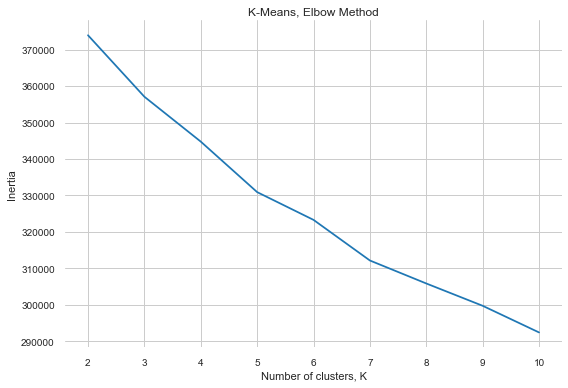

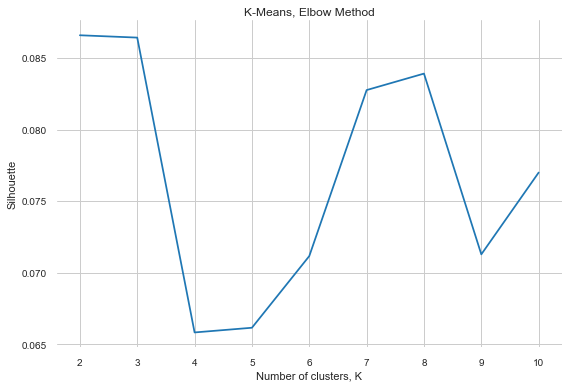

In [36]:
inertias = {}
silhouettes = {}
for k in range(2, 11):
    kmeans = KMeans(init='k-means++', n_init=10, n_clusters=k, max_iter=1000, random_state=42).fit(X1)
    inertias[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    silhouettes[k] = silhouette_score(X1, kmeans.labels_, metric='euclidean')
    

plt.figure();
plt.grid(True);
plt.plot(list(inertias.keys()), list(inertias.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Inertia");

plt.figure();
plt.grid(True);
plt.plot(list(silhouettes.keys()), list(silhouettes.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Silhouette");

# Interpretting the Clusters

In [25]:
#means
k_means.cluster_centers_

array([[ 2.23301180e-02,  2.16034393e-01,  4.75256412e-02,
         2.83750784e-04, -4.47248019e-02,  1.30264958e-02,
        -5.55078950e-03,  2.87852486e-01,  4.08821710e-01,
        -4.08821710e-01, -2.50305119e-02, -4.44737531e-03,
         4.97384610e-02, -2.44072831e-02, -3.80790011e-03,
        -4.24116957e-02,  7.77617967e-02, -5.20061509e-02,
         2.37020746e-01,  3.39413645e-01,  2.35942807e-01,
        -5.56564807e-02, -5.82997067e-01, -6.80977128e-02,
         6.80977128e-02, -4.90778986e-01,  7.61938494e-01,
        -4.57690870e-01,  5.13276117e-02,  1.99450704e-01,
        -2.62972064e-01, -7.28251923e-03,  1.40408922e-02,
        -1.57660010e-02, -5.98017059e-02,  2.23325343e-02,
         2.35934123e-02,  2.74947050e-02, -9.69998664e-03,
         5.51118908e-02,  1.79250714e-02, -1.53933559e-02,
        -1.68200063e-02,  1.21571937e-02],
       [-2.18422408e-02,  2.91869267e-02,  2.68240721e-02,
        -4.05975176e-02,  7.21967735e-03, -2.41699059e-02,
        -5.11

# Exemplars

In [26]:
#identify exemplars - identify the obs closest to the cluster center
from scipy.spatial import distance

for i, label in enumerate(set(k_means.labels_)):    
    X_tmp = X1[k_means.labels_==label].copy()
    
    exemplar_idx = distance.cdist([k_means.cluster_centers_[i]], X_tmp).argmin()
    exemplar = pd.DataFrame(X_tmp.iloc[exemplar_idx])
   
    print('\nCluster {}:'.format(label))
    exemplar



Cluster 0:


,6458
CustomerLifetimeValue,-0.426470
Income,0.460909
MonthlyPremiumAuto,-0.849248
MonthsSinceLastClaim,0.387483
MonthsSincePolicyInception,-0.396517
NumberofOpenComplaints,-0.422250
NumberofPolicies,0.014154
TotalClaimAmount,-0.436818
Response_No,0.408822
Response_Yes,-0.408822



Cluster 1:


,2358
CustomerLifetimeValue,-0.104781
Income,0.234728
MonthlyPremiumAuto,-0.936442
MonthsSinceLastClaim,-0.903134
MonthsSincePolicyInception,-0.002315
NumberofOpenComplaints,-0.422250
NumberofPolicies,-0.404247
TotalClaimAmount,-0.165439
Response_No,-2.446054
Response_Yes,2.446054



Cluster 2:


,5369
CustomerLifetimeValue,0.058429
Income,0.160728
MonthlyPremiumAuto,-0.674860
MonthsSinceLastClaim,-0.009630
MonthsSincePolicyInception,0.141031
NumberofOpenComplaints,-0.422250
NumberofPolicies,-0.404247
TotalClaimAmount,-1.344444
Response_No,0.408822
Response_Yes,-0.408822



Cluster 3:


,3405
CustomerLifetimeValue,-0.394613
Income,-1.239617
MonthlyPremiumAuto,-0.558602
MonthsSinceLastClaim,-0.108908
MonthsSincePolicyInception,-0.181498
NumberofOpenComplaints,-0.422250
NumberofPolicies,0.432555
TotalClaimAmount,0.957153
Response_No,0.408822
Response_Yes,-0.408822


In [27]:
#exemplars
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

 

from scipy.spatial import distance

 

for i, label in enumerate(set(k_means.labels_)):
    X1_scaled_tmp = X1
    exemplar = distance.cdist([k_means.cluster_centers_[i]], X1_scaled_tmp).argmin()
    
    print('\nCluster {}:'.format(label))
    display(df.iloc[[exemplar]])


Cluster 0:


,Customer,State,CustomerLifetimeValue,EffectiveToDate,Income,MonthlyPremiumAuto,MonthsSinceLastClaim,MonthsSincePolicyInception,NumberofOpenComplaints,NumberofPolicies,Policy,RenewOfferType,TotalClaimAmount,VehicleSize,Response_No,Response_Yes,Coverage_Basic,Coverage_Extended,Coverage_Premium,Education_Bachelor,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Disabled,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Gender_F,Gender_M,LocationCode_Rural,LocationCode_Suburban,LocationCode_Urban,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,PolicyType_Corporate Auto,PolicyType_Personal Auto,PolicyType_Special Auto,SalesChannel_Agent,SalesChannel_Branch,SalesChannel_Call Center,SalesChannel_Web,VehicleClass_Four-Door Car,VehicleClass_Luxury Car,VehicleClass_Luxury SUV,VehicleClass_SUV,VehicleClass_Sports Car,VehicleClass_Two-Door Car,KMeans_4_Cluster
6458,BC51708,California,5074.841142,2/27/11,51659,64,19,37,0,3,Personal L2,Offer2,307.2,Medsize,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0



Cluster 1:


,Customer,State,CustomerLifetimeValue,EffectiveToDate,Income,MonthlyPremiumAuto,MonthsSinceLastClaim,MonthsSincePolicyInception,NumberofOpenComplaints,NumberofPolicies,Policy,RenewOfferType,TotalClaimAmount,VehicleSize,Response_No,Response_Yes,Coverage_Basic,Coverage_Extended,Coverage_Premium,Education_Bachelor,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Disabled,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Gender_F,Gender_M,LocationCode_Rural,LocationCode_Suburban,LocationCode_Urban,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,PolicyType_Corporate Auto,PolicyType_Personal Auto,PolicyType_Special Auto,SalesChannel_Agent,SalesChannel_Branch,SalesChannel_Call Center,SalesChannel_Web,VehicleClass_Four-Door Car,VehicleClass_Luxury Car,VehicleClass_Luxury SUV,VehicleClass_SUV,VehicleClass_Sports Car,VehicleClass_Two-Door Car,KMeans_4_Cluster
2358,NM95102,Oregon,7285.030983,2/28/11,44788,61,6,48,0,2,Personal L3,Offer2,386.031248,Small,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1



Cluster 2:


,Customer,State,CustomerLifetimeValue,EffectiveToDate,Income,MonthlyPremiumAuto,MonthsSinceLastClaim,MonthsSincePolicyInception,NumberofOpenComplaints,NumberofPolicies,Policy,RenewOfferType,TotalClaimAmount,VehicleSize,Response_No,Response_Yes,Coverage_Basic,Coverage_Extended,Coverage_Premium,Education_Bachelor,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Disabled,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Gender_F,Gender_M,LocationCode_Rural,LocationCode_Suburban,LocationCode_Urban,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,PolicyType_Corporate Auto,PolicyType_Personal Auto,PolicyType_Special Auto,SalesChannel_Agent,SalesChannel_Branch,SalesChannel_Call Center,SalesChannel_Web,VehicleClass_Four-Door Car,VehicleClass_Luxury Car,VehicleClass_Luxury SUV,VehicleClass_SUV,VehicleClass_Sports Car,VehicleClass_Two-Door Car,KMeans_4_Cluster
5369,AF47139,Oregon,8406.385414,2/3/11,42540,70,15,52,0,2,Personal L1,Offer1,43.548973,Medsize,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,2



Cluster 3:


,Customer,State,CustomerLifetimeValue,EffectiveToDate,Income,MonthlyPremiumAuto,MonthsSinceLastClaim,MonthsSincePolicyInception,NumberofOpenComplaints,NumberofPolicies,Policy,RenewOfferType,TotalClaimAmount,VehicleSize,Response_No,Response_Yes,Coverage_Basic,Coverage_Extended,Coverage_Premium,Education_Bachelor,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Disabled,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Gender_F,Gender_M,LocationCode_Rural,LocationCode_Suburban,LocationCode_Urban,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,PolicyType_Corporate Auto,PolicyType_Personal Auto,PolicyType_Special Auto,SalesChannel_Agent,SalesChannel_Branch,SalesChannel_Call Center,SalesChannel_Web,VehicleClass_Four-Door Car,VehicleClass_Luxury Car,VehicleClass_Luxury SUV,VehicleClass_SUV,VehicleClass_Sports Car,VehicleClass_Two-Door Car,KMeans_4_Cluster
3405,QK12068,Oregon,5293.717318,1/17/11,0,74,14,43,0,4,Personal L3,Offer4,712.126586,Small,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,3


# Relative Importance Plots

C:\Users\shrut\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  fig.canvas.print_figure(bytes_io, **kw)


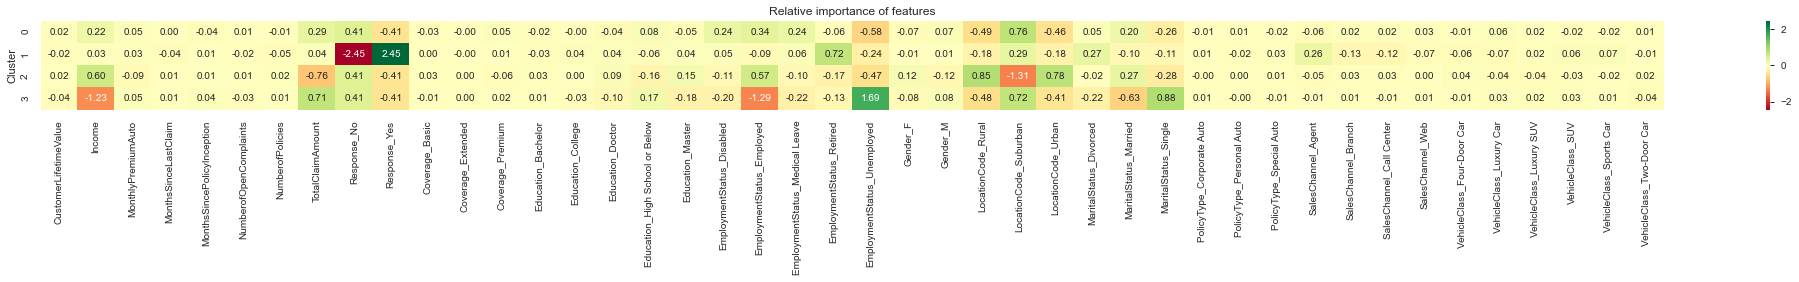

In [28]:
#relative importance features

dat = X1.copy()

dat['Cluster'] = k_means.labels_

cluster_avg = dat.groupby(['Cluster']).mean()
population_avg = dat.drop(['Cluster'], axis=1).mean()

relative_imp = cluster_avg - population_avg

plt.figure(figsize=(29, 2));
plt.title('Relative importance of features');
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn');

In [29]:
relative_imp

,CustomerLifetimeValue,Income,MonthlyPremiumAuto,MonthsSinceLastClaim,MonthsSincePolicyInception,NumberofOpenComplaints,NumberofPolicies,TotalClaimAmount,Response_No,Response_Yes,Coverage_Basic,Coverage_Extended,Coverage_Premium,Education_Bachelor,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Disabled,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Gender_F,Gender_M,LocationCode_Rural,LocationCode_Suburban,LocationCode_Urban,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,PolicyType_Corporate Auto,PolicyType_Personal Auto,PolicyType_Special Auto,SalesChannel_Agent,SalesChannel_Branch,SalesChannel_Call Center,SalesChannel_Web,VehicleClass_Four-Door Car,VehicleClass_Luxury Car,VehicleClass_Luxury SUV,VehicleClass_SUV,VehicleClass_Sports Car,VehicleClass_Two-Door Car
Cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.022330,0.216034,0.047526,0.000284,-0.044725,0.013026,-0.005551,0.287852,0.408822,-0.408822,-0.025031,-0.004447,0.049738,-0.024407,-0.003808,-0.042412,0.077762,-0.052006,0.237021,0.339414,0.235943,-0.055656,-0.582997,-0.068098,0.068098,-0.490779,0.761938,-0.457691,0.051328,0.199451,-0.262972,-0.007283,0.014041,-0.015766,-0.059802,0.022333,0.023593,0.027495,-0.009700,0.055112,0.017925,-0.015393,-0.016820,0.012157
1,-0.021842,0.029187,0.026824,-0.040598,0.007220,-0.024170,-0.051101,0.041283,-2.446054,2.446054,0.001027,-0.004433,0.005343,-0.025866,0.040424,0.044400,-0.056570,0.038889,0.052009,-0.094631,0.058120,0.723165,-0.235094,-0.010753,0.010753,-0.177634,0.286163,-0.178887,0.274061,-0.097093,-0.112400,0.011492,-0.024586,0.030208,0.264666,-0.125176,-0.117632,-0.073251,-0.057700,-0.065497,0.019867,0.059267,0.070615,-0.011479
2,0.017797,0.597989,-0.089902,0.012974,0.011411,0.014889,0.020959,-0.759272,0.408822,-0.408822,0.032863,0.003263,-0.061181,0.027881,0.004102,0.089486,-0.162070,0.152643,-0.112211,0.573059,-0.100852,-0.174648,-0.466291,0.119826,-0.119826,0.854377,-1.312442,0.778959,-0.020072,0.268559,-0.282391,-0.003372,0.000658,0.005516,-0.051229,0.025276,0.033444,0.000874,0.040286,-0.044544,-0.041803,-0.030430,-0.018750,0.019574
3,-0.044300,-1.231775,0.051069,0.006642,0.041467,-0.025155,0.009737,0.714324,0.408822,-0.408822,-0.014918,0.004287,0.018545,0.009429,-0.027391,-0.104537,0.172303,-0.182963,-0.200745,-1.287759,-0.220440,-0.131981,1.688698,-0.077759,0.077759,-0.480610,0.718136,-0.412519,-0.222697,-0.626153,0.875062,0.007891,-0.004764,-0.005837,-0.011539,0.012321,-0.006803,0.007810,-0.009311,0.032301,0.024808,0.028977,0.005847,-0.039363


In [49]:
df

,Customer,State,CustomerLifetimeValue,EffectiveToDate,Income,MonthlyPremiumAuto,MonthsSinceLastClaim,MonthsSincePolicyInception,NumberofOpenComplaints,NumberofPolicies,...,SalesChannel_Branch,SalesChannel_Call Center,SalesChannel_Web,VehicleClass_Four-Door Car,VehicleClass_Luxury Car,VehicleClass_Luxury SUV,VehicleClass_SUV,VehicleClass_Sports Car,VehicleClass_Two-Door Car,KMeans_4_Cluster
0,BU79786,Washington,2763.519279,2/24/11,56274,69,32,5,0,1,...,0,0,0,0,0,0,0,0,1,0
1,QZ44356,Arizona,6979.535903,1/31/11,0,94,13,42,0,8,...,0,0,0,1,0,0,0,0,0,3
2,AI49188,Nevada,12887.431650,2/19/11,48767,108,18,38,0,2,...,0,0,0,0,0,0,0,0,1,0
3,WW63253,California,7645.861827,1/20/11,0,106,18,65,0,7,...,0,1,0,0,0,0,1,0,0,3
4,HB64268,Washington,2813.692575,2/3/11,43836,73,12,44,0,1,...,0,0,0,1,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,2/10/11,71941,73,18,89,0,2,...,0,0,1,1,0,0,0,0,0,2
9130,PK87824,California,3096.511217,2/12/11,21604,79,14,28,0,1,...,1,0,0,1,0,0,0,0,0,1
9131,TD14365,California,8163.890428,2/6/11,0,85,9,37,3,2,...,1,0,0,1,0,0,0,0,0,3
9132,UP19263,California,7524.442436,2/3/11,21941,96,34,3,0,3,...,1,0,0,1,0,0,0,0,0,0


In [31]:
#creating CSV for clustering
cluster_k_mean_4.to_csv('Marketing_CLV_Cluster_KMeans4.csv', index=True)

# Hierarchical Agglomerative Clustering

In [33]:
#Hirarchical agglomerative clustering
agg = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
agg.fit(X1)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=4)

In [34]:
agg.labels_[:100]

array([1, 0, 1, 1, 1, 3, 3, 1, 0, 1, 0, 0, 1, 3, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 3, 3, 1,
       1, 1, 0, 1, 0, 0, 1, 3, 1, 1, 0, 1, 1, 0, 0, 0, 3, 0, 0, 1, 0, 1,
       1, 1, 3, 0, 1, 1, 0, 1, 3, 1, 1, 1, 1, 2, 0, 3, 1, 1, 0, 1, 3, 1,
       1, 3, 0, 3, 1, 1, 0, 1, 0, 0, 1, 1], dtype=int64)

In [35]:
#Calculating Silhouette Score
silhouette_score(X1, agg.labels_)

0.06422708468175355

In [36]:
#CHECKING CLUSTER SIZES

#generate cluster means
cluster_labels = agg.labels_
cluster_labels

#examine feature means for each of our 4 clusters
means = np.zeros((4, X1.shape[1])) #create empty matrix

for i, label in enumerate(set(cluster_labels)):
    means[i,:] = X1[cluster_labels==label].mean(axis=0)
    print('\nCluster {} (n={}):'.format(label, sum(cluster_labels==label)))
    #print(scaler.inverse_transform(means[i,:])) #reverse the prior standardization for interpretable results r
    
means

array([1, 0, 1, ..., 0, 1, 0], dtype=int64)


Cluster 0 (n=2217):

Cluster 1 (n=5521):

Cluster 2 (n=347):

Cluster 3 (n=1049):


array([[-1.91014901e-01, -1.00598620e+00, -2.80934035e-01,
         6.26704316e-03,  2.02345718e-02, -3.42819651e-02,
         5.66234001e-04,  2.24462245e-01,  2.42705799e-01,
        -2.42705799e-01,  9.01836602e-02,  2.50584708e-02,
        -1.93659765e-01,  6.88513791e-02,  1.90864491e-02,
        -1.92476380e-01,  9.63055797e-02, -1.73227721e-01,
         5.77821075e-01, -1.27379229e+00,  5.93162958e-01,
        -1.78485875e-01,  9.26377491e-01,  1.75159039e-02,
        -1.75159039e-02, -3.34538671e-01,  5.28956664e-01,
        -3.24191533e-01, -1.07766896e-01, -3.59097989e-01,
         4.85808430e-01, -4.90094367e-02,  1.20195407e-01,
        -1.62482347e-01, -2.87382496e-02, -9.09230696e-03,
         3.03879491e-02,  1.71587589e-02,  1.45606161e-01,
        -1.34794873e-01, -1.43382911e-01, -5.43886802e-02,
        -1.53989505e-01,  5.26311143e-02],
       [ 9.55047066e-03,  4.03743522e-01, -7.44999054e-02,
         4.91736885e-03, -1.20252889e-02,  1.30908220e-02,
         1.13

<Figure size 2160x144 with 0 Axes>

Text(0.5, 1.0, 'Relative importance of features Hierarchical')

C:\Users\shrut\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  fig.canvas.print_figure(bytes_io, **kw)


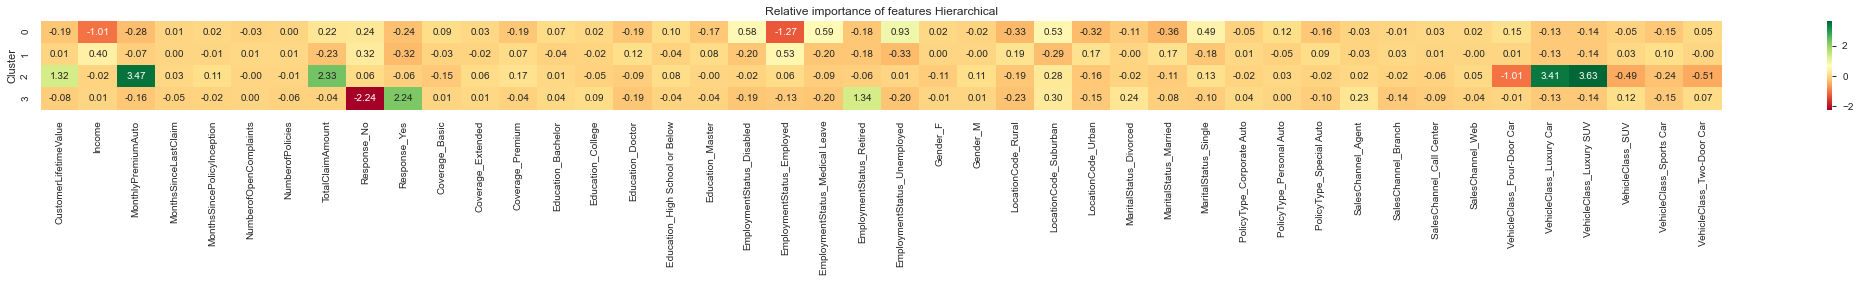

In [37]:
#Relative Importance Plot
dat = X1.copy()

dat['Cluster'] = agg.labels_

cluster_avg = dat.groupby(['Cluster']).mean()
population_avg = dat.drop(['Cluster'], axis=1).mean()

relative_imp = cluster_avg - population_avg

plt.figure(figsize=(30, 2));
plt.title('Relative importance of features Hierarchical');
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')

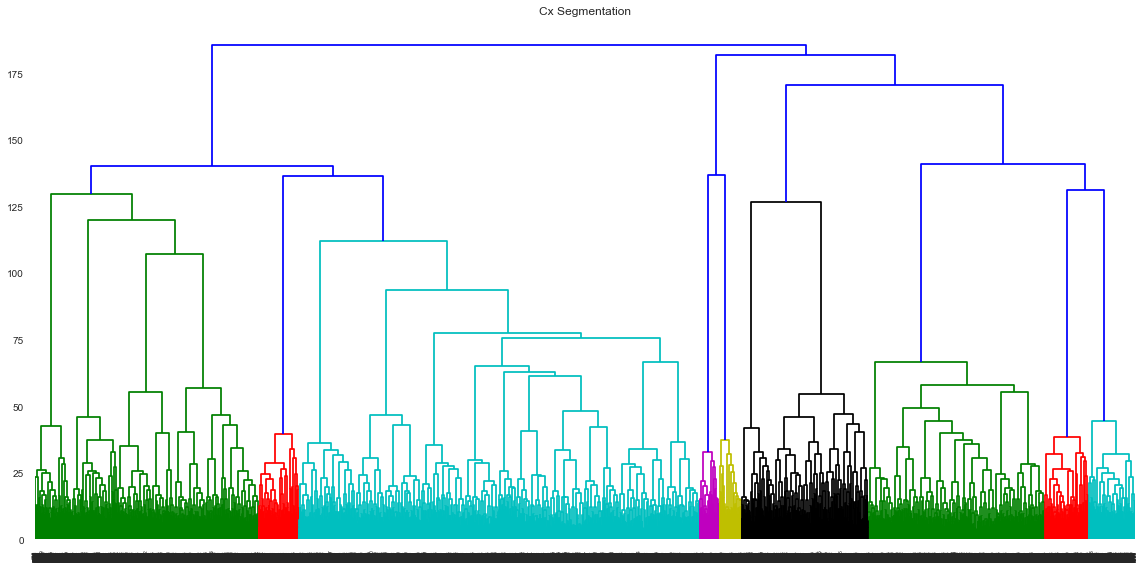

In [38]:
#using dendogram to plot
import scipy.cluster

aggl = scipy.cluster.hierarchy.linkage(X1, method='ward', metric='euclidean')

# Plot the dendogram
plt.figure(figsize=(16, 8));
plt.grid(False)
plt.title("Cx Segmentation");  
dend = scipy.cluster.hierarchy.dendrogram(aggl);

In [39]:
#interpreting clusters
df['Agg_Cluster'] = agg.labels_
df.head()

,Customer,State,CustomerLifetimeValue,EffectiveToDate,Income,MonthlyPremiumAuto,MonthsSinceLastClaim,MonthsSincePolicyInception,NumberofOpenComplaints,NumberofPolicies,Policy,RenewOfferType,TotalClaimAmount,VehicleSize,Response_No,Response_Yes,Coverage_Basic,Coverage_Extended,Coverage_Premium,Education_Bachelor,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Disabled,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Gender_F,Gender_M,LocationCode_Rural,LocationCode_Suburban,LocationCode_Urban,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,PolicyType_Corporate Auto,PolicyType_Personal Auto,PolicyType_Special Auto,SalesChannel_Agent,SalesChannel_Branch,SalesChannel_Call Center,SalesChannel_Web,VehicleClass_Four-Door Car,VehicleClass_Luxury Car,VehicleClass_Luxury SUV,VehicleClass_SUV,VehicleClass_Sports Car,VehicleClass_Two-Door Car,KMeans_4_Cluster,Agg_Cluster
0,BU79786,Washington,2763.519279,2/24/11,56274,69,32,5,0,1,Corporate L3,Offer1,384.811147,Medsize,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1
1,QZ44356,Arizona,6979.535903,1/31/11,0,94,13,42,0,8,Personal L3,Offer3,1131.464935,Medsize,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,3,0
2,AI49188,Nevada,12887.431650,2/19/11,48767,108,18,38,0,2,Personal L3,Offer1,566.472247,Medsize,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1
3,WW63253,California,7645.861827,1/20/11,0,106,18,65,0,7,Corporate L2,Offer1,529.881344,Medsize,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,3,1
4,HB64268,Washington,2813.692575,2/3/11,43836,73,12,44,0,1,Personal L1,Offer1,138.130879,Medsize,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,2,1


In [40]:
cluster_agg = df.groupby(['Agg_Cluster']).mean()
cluster_agg

,CustomerLifetimeValue,Income,MonthlyPremiumAuto,MonthsSinceLastClaim,MonthsSincePolicyInception,NumberofOpenComplaints,NumberofPolicies,TotalClaimAmount,Response_No,Response_Yes,Coverage_Basic,Coverage_Extended,Coverage_Premium,Education_Bachelor,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Disabled,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Gender_F,Gender_M,LocationCode_Rural,LocationCode_Suburban,LocationCode_Urban,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,PolicyType_Corporate Auto,PolicyType_Personal Auto,PolicyType_Special Auto,SalesChannel_Agent,SalesChannel_Branch,SalesChannel_Call Center,SalesChannel_Web,VehicleClass_Four-Door Car,VehicleClass_Luxury Car,VehicleClass_Luxury SUV,VehicleClass_SUV,VehicleClass_Sports Car,VehicleClass_Two-Door Car,KMeans_4_Cluster
Agg_Cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,6692.555125,7097.288227,83.553451,15.160126,48.629229,0.353180,2.967524,499.291527,0.941813,0.058187,0.653586,0.311682,0.034732,0.332431,0.302210,0.000902,0.330627,0.033829,0.163284,0.006766,0.173207,0.000000,0.656743,0.518719,0.481281,0.061795,0.887686,0.050519,0.111412,0.402797,0.485792,0.195309,0.795670,0.009021,0.366712,0.276951,0.205232,0.151105,0.578710,0.000000,0.000000,0.175011,0.018493,0.227785,2.102391
1,8070.557857,49922.398297,90.656041,15.146531,47.729035,0.396305,2.993298,367.631761,0.970114,0.029886,0.595725,0.292701,0.111574,0.284188,0.283282,0.060134,0.270422,0.101974,0.004166,0.881543,0.005796,0.000000,0.108495,0.510777,0.489223,0.268973,0.494113,0.236914,0.149611,0.662199,0.188191,0.220612,0.721065,0.058323,0.363883,0.295055,0.196703,0.144358,0.509509,0.000000,0.000000,0.208477,0.076435,0.205579,1.293787
2,17090.281353,37105.481268,212.682997,15.371758,51.230548,0.383285,2.939481,1110.264309,0.878963,0.121037,0.536023,0.325648,0.138329,0.305476,0.270893,0.020173,0.322767,0.080692,0.040346,0.654179,0.028818,0.020173,0.256484,0.455331,0.544669,0.118156,0.769452,0.112392,0.144092,0.527378,0.328530,0.207493,0.755043,0.037464,0.391931,0.273775,0.170029,0.164265,0.000000,0.469741,0.530259,0.000000,0.000000,0.000000,1.363112
3,7427.887536,37874.793136,87.620591,14.612011,47.590086,0.387989,2.829361,422.384237,0.073403,0.926597,0.613918,0.306959,0.079123,0.320305,0.336511,0.000953,0.270734,0.071497,0.005720,0.561487,0.005720,0.262154,0.164919,0.505243,0.494757,0.104862,0.777884,0.117255,0.234509,0.539561,0.225929,0.233556,0.744519,0.021926,0.494757,0.218303,0.157293,0.129647,0.500477,0.000000,0.000000,0.244995,0.020019,0.234509,0.976168
